In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-cities-countries-and-languages-dataset/city.csv
/kaggle/input/world-cities-countries-and-languages-dataset/countrylanguage.csv
/kaggle/input/world-cities-countries-and-languages-dataset/country.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [90]:
import warnings
warnings.filterwarnings("ignore")


In [92]:
country_data = '/kaggle/input/world-cities-countries-and-languages-dataset/country.csv'
city_data = '/kaggle/input/world-cities-countries-and-languages-dataset/city.csv'
language_data = "/kaggle/input/world-cities-countries-and-languages-dataset/countrylanguage.csv"

In [94]:
#load data
country_df = pd.read_csv(country_data)
city_df = pd.read_csv(city_data)
lang_df = pd.read_csv(language_data)

In [95]:
#print country data
print("----COUNTRY DATA---")
print(country_df.head())

#print city data
print("\n----CITY DATA---")
print(city_df.head())

#print language data
print("----LANGUAGE DATA---")
print(lang_df.head())

----COUNTRY DATA---
  Code         Name      Continent                     Region  SurfaceArea  \
0  ABW        Aruba  North America                  Caribbean        193.0   
1  AFG  Afghanistan           Asia  Southern and Central Asia     652090.0   
2  AGO       Angola         Africa             Central Africa    1246700.0   
3  AIA     Anguilla  North America                  Caribbean         96.0   
4  ALB      Albania         Europe            Southern Europe      28748.0   

   IndepYear  Population  LifeExpectancy     GNP  GNPOld  \
0        NaN      103000            78.4   828.0   793.0   
1     1919.0    22720000            45.9  5976.0     NaN   
2     1975.0    12878000            38.3  6648.0  7984.0   
3        NaN        8000            76.1    63.2     NaN   
4     1912.0     3401200            71.6  3205.0  2500.0   

               LocalName                                GovernmentForm  \
0                  Aruba  Nonmetropolitan Territory of The Netherlands   
1 

In [96]:
# Check country dataframe
print('Country DataFrame Info:')
country_df.info()

Country DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    float64
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     236 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           238 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 28.1+ KB


In [97]:
# Check city dataframe
print('City DataFrame Info:')
city_df.info()

City DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           4079 non-null   int64 
 1   Name         4079 non-null   object
 2   CountryCode  4079 non-null   object
 3   District     4075 non-null   object
 4   Population   4079 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 159.5+ KB


In [98]:
# Check language dataframe
print('Language DataFrame Info:')
lang_df.info()

Language DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  984 non-null    object 
 1   Language     984 non-null    object 
 2   IsOfficial   984 non-null    object 
 3   Percentage   984 non-null    float64
dtypes: float64(1), object(3)
memory usage: 30.9+ KB


In [99]:
country_df['IndepYear'] = country_df['IndepYear'].fillna(country_df['IndepYear'].median())

In [100]:
print("cleaned country dataset")
print(country_df)

cleaned country dataset
    Code          Name      Continent                     Region  SurfaceArea  \
0    ABW         Aruba  North America                  Caribbean        193.0   
1    AFG   Afghanistan           Asia  Southern and Central Asia     652090.0   
2    AGO        Angola         Africa             Central Africa    1246700.0   
3    AIA      Anguilla  North America                  Caribbean         96.0   
4    ALB       Albania         Europe            Southern Europe      28748.0   
..   ...           ...            ...                        ...          ...   
234  YEM         Yemen           Asia                Middle East     527968.0   
235  YUG    Yugoslavia         Europe            Southern Europe     102173.0   
236  ZAF  South Africa         Africa            Southern Africa    1221037.0   
237  ZMB        Zambia         Africa             Eastern Africa     752618.0   
238  ZWE      Zimbabwe         Africa             Eastern Africa     390757.0   

   

In [101]:
df=pd.read_csv('/kaggle/input/world-cities-countries-and-languages-dataset/country.csv')
df.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


In [102]:
#Descriptive statistics for the dataset
df.describe()

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital
count,2.390000e+02,192.000000,2.390000e+02,222.000000,2.390000e+02,1.780000e+02,232.000000
mean,6.232481e+05,1847.260417,2.543410e+07,66.486036,1.228239e+05,1.655343e+05,2071.306034
std,1.924140e+06,420.831370,1.093398e+08,11.519267,6.379976e+05,7.204689e+05,1184.095609
min,4.000000e-01,-1523.000000,0.000000e+00,37.200000,0.000000e+00,1.570000e+02,1.000000
25%,2.275000e+03,1906.750000,2.380000e+05,60.300000,6.400000e+02,2.187000e+03,915.750000
50%,7.174000e+04,1960.000000,3.869000e+06,70.150000,4.787000e+03,8.421000e+03,2449.500000
75%,3.987545e+05,1974.000000,1.493550e+07,75.500000,2.994450e+04,7.114550e+04,3065.250000
max,1.707540e+07,1994.000000,1.277558e+09,83.500000,8.510700e+06,8.110900e+06,4074.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    float64
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     236 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           238 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 28.1+ KB


In [104]:
df.dtypes

Code               object
Name               object
Continent          object
Region             object
SurfaceArea       float64
IndepYear         float64
Population          int64
LifeExpectancy    float64
GNP               float64
GNPOld            float64
LocalName          object
GovernmentForm     object
HeadOfState        object
Capital           float64
Code2              object
dtype: object

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    float64
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     236 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           238 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 28.1+ KB


In [106]:
# to check the dependency of the variables
corr_matrix = df.corr(numeric_only= True).round(2)
print(corr_matrix)

                SurfaceArea  IndepYear  Population  LifeExpectancy   GNP  \
SurfaceArea            1.00      -0.20        0.42            0.00  0.34   
IndepYear             -0.20       1.00       -0.48           -0.15 -0.28   
Population             0.42      -0.48        1.00            0.01  0.28   
LifeExpectancy         0.00      -0.15        0.01            1.00  0.16   
GNP                    0.34      -0.28        0.28            0.16  1.00   
GNPOld                 0.38      -0.31        0.27            0.19  1.00   
Capital                0.00       0.06       -0.04           -0.01  0.06   

                GNPOld  Capital  
SurfaceArea       0.38     0.00  
IndepYear        -0.31     0.06  
Population        0.27    -0.04  
LifeExpectancy    0.19    -0.01  
GNP               1.00     0.06  
GNPOld            1.00     0.07  
Capital           0.07     1.00  


Text(0.5, 1.0, 'Correlation matrix of Numerical features in country dataset')

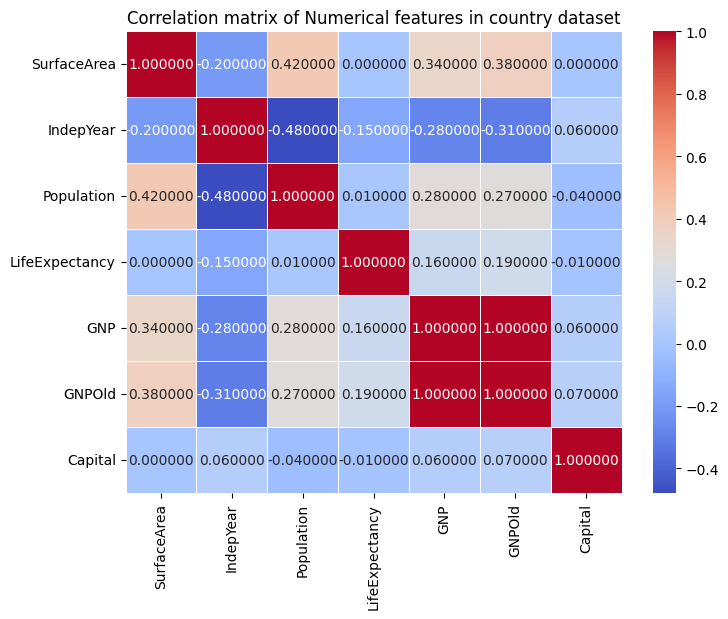

In [108]:
#correlation heatmap
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt='.6f',linewidths =0.5 )
plt.title("Correlation matrix of Numerical features in country dataset")

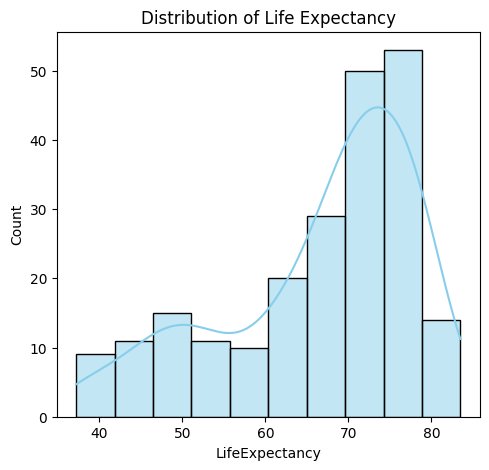

In [109]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(country_df['LifeExpectancy'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.savefig("/kaggle/working/life_expectancy_distribution.png", dpi=300, bbox_inches="tight")


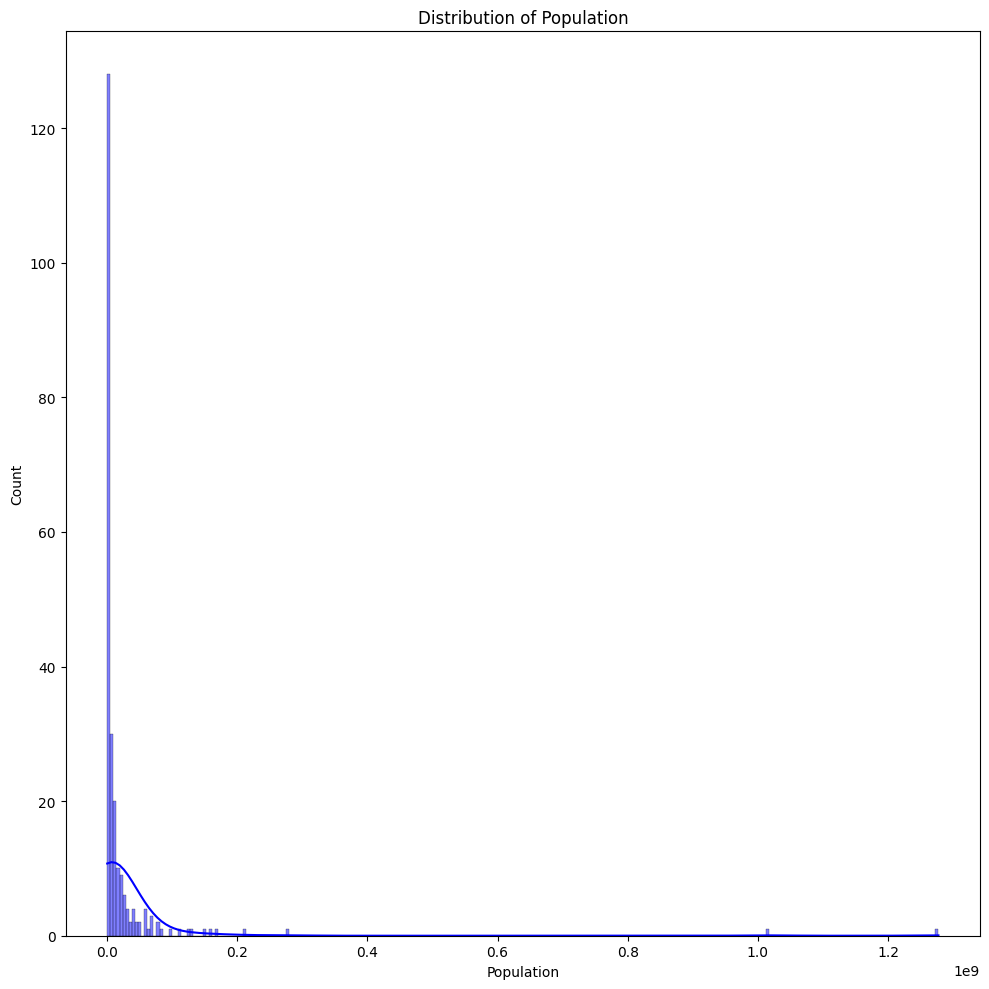

In [110]:
#histogram for population
plt.figure(figsize=(10, 10))
sns.histplot(country_df['Population'].dropna(), kde=True, color='blue')
plt.title('Distribution of Population')

plt.tight_layout()
plt.show()


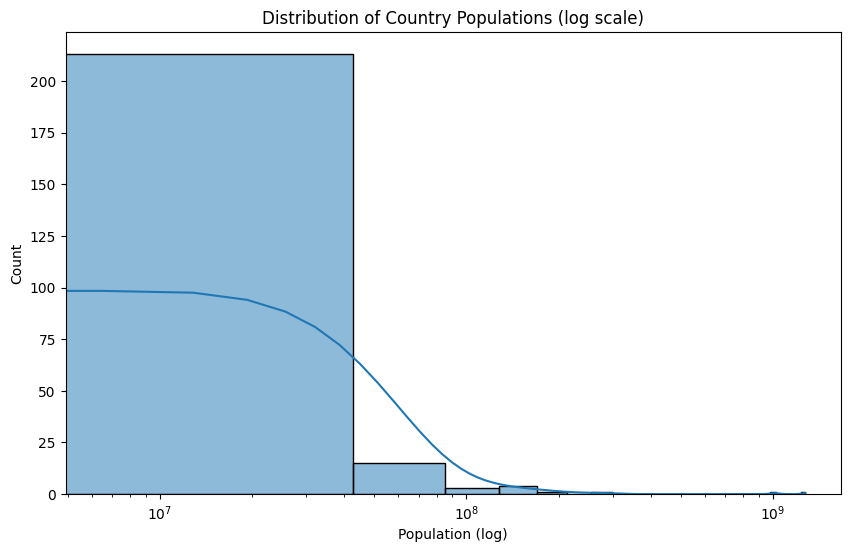

<Figure size 640x480 with 0 Axes>

In [111]:
# a better graph using log transformation
plt.figure(figsize=(10,6))
sns.histplot(df['Population'], bins=30, kde=True)
plt.xscale("log")  # log scale because populations vary widely
plt.title("Distribution of Country Populations (log scale)")
plt.xlabel("Population (log)")
plt.ylabel("Count")
plt.show()
plt.savefig("/kaggle/working/population_distribution.png", dpi=300, bbox_inches="tight")

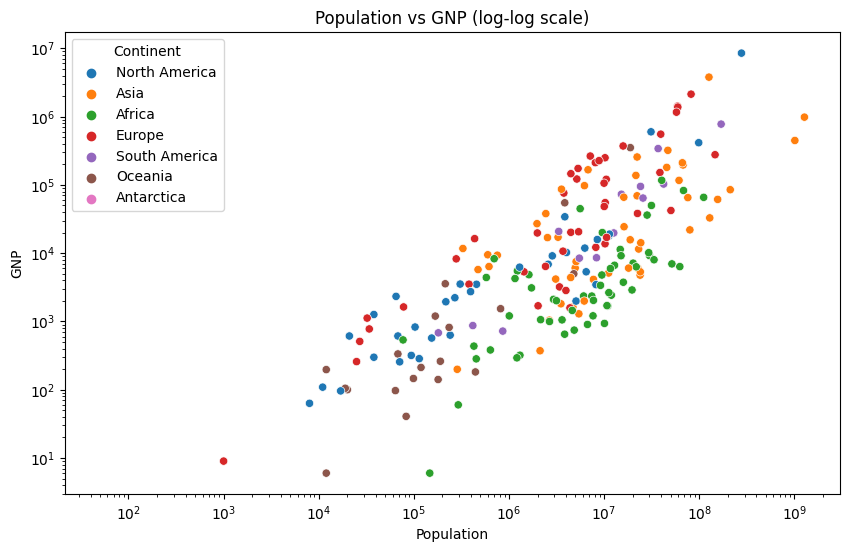

<Figure size 640x480 with 0 Axes>

In [112]:
#scatter plot to understand the realtion between pop and GNP
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Population", y="GNP", hue="Continent")
plt.xscale("log")
plt.yscale("log")
plt.title("Population vs GNP (log-log scale)")
plt.xlabel("Population")
plt.ylabel("GNP")
plt.show()
plt.savefig("/kaggle/working/pop_vs_gnp.png", dpi=300, bbox_inches="tight")

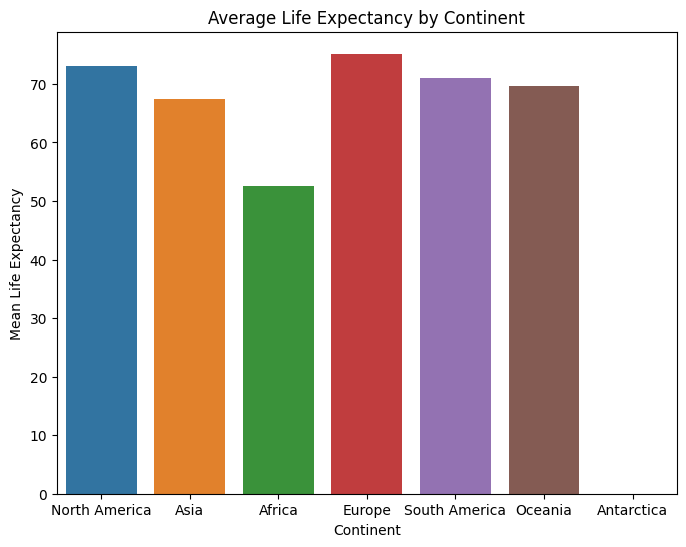

<Figure size 640x480 with 0 Axes>

In [113]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="Continent", y="LifeExpectancy", estimator="mean", ci=None)
plt.title("Average Life Expectancy by Continent")
plt.ylabel("Mean Life Expectancy")
plt.show()
plt.savefig("/kaggle/working/avg_life_expectancy.png", dpi=300, bbox_inches="tight")

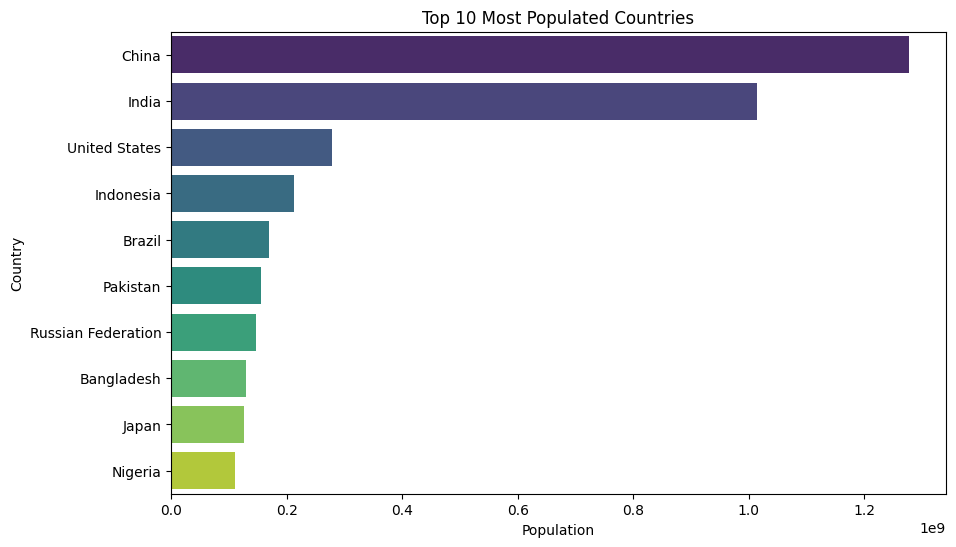

<Figure size 640x480 with 0 Axes>

In [114]:
top_pop = df.nlargest(10, "Population")
plt.figure(figsize=(10,6))
sns.barplot(data=top_pop, x="Population", y="Name", palette="viridis")
plt.title("Top 10 Most Populated Countries")
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()
plt.savefig("/kaggle/working/most_populated.png", dpi=300, bbox_inches="tight")


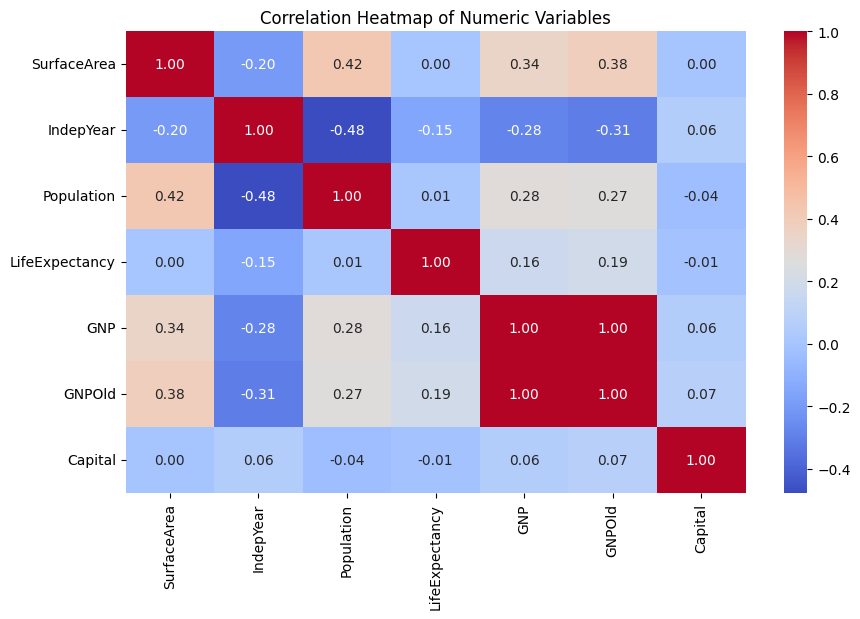

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


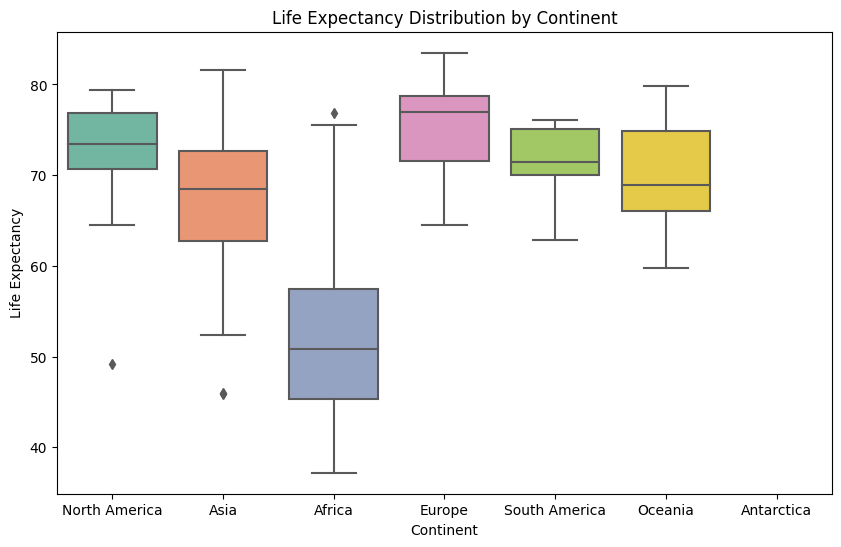

<Figure size 640x480 with 0 Axes>

In [116]:
#boxplot for life expectancy distribution by continent
plt.figure(figsize=(10,6))
sns.boxplot(x="Continent", y="LifeExpectancy", data=df, palette="Set2")
plt.title("Life Expectancy Distribution by Continent")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy")
plt.show()
plt.savefig("/kaggle/working/boxplot_life_expectancy.png", dpi=300, bbox_inches="tight")

<Figure size 1500x800 with 0 Axes>

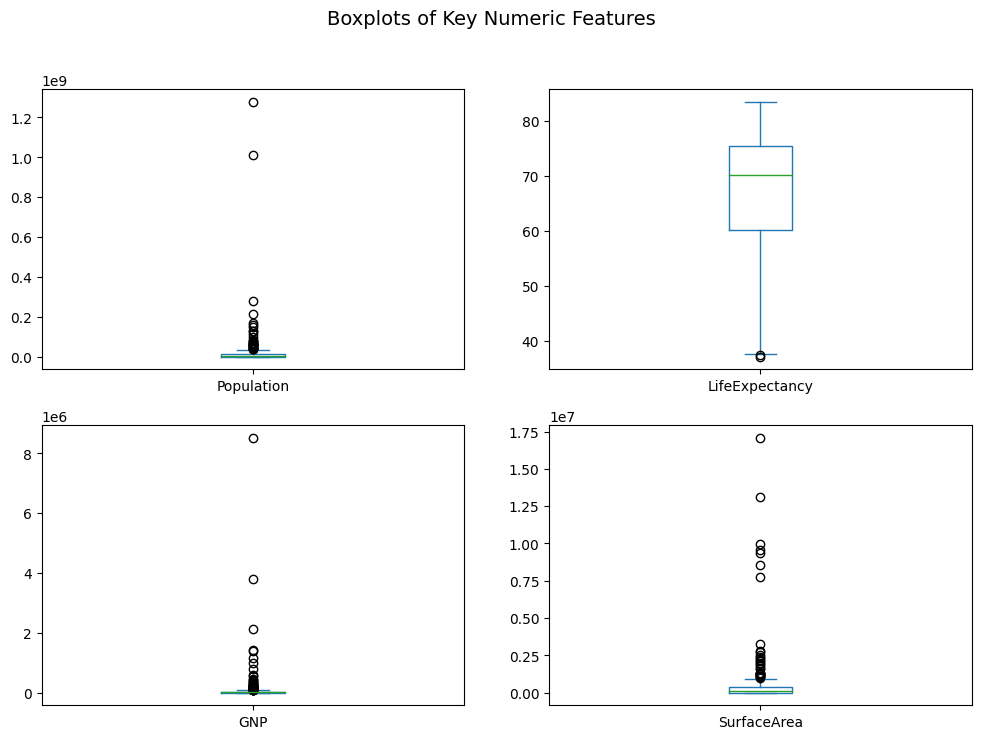

In [117]:
num_cols = ["Population", "LifeExpectancy", "GNP", "SurfaceArea"]
plt.figure(figsize=(15,8))
df[num_cols].plot(kind="box", subplots=True, layout=(2,2), figsize=(12,8), sharex=False, sharey=False)
plt.suptitle("Boxplots of Key Numeric Features", fontsize=14)
plt.show()

We can concluded that by looking at the visualisations that the distribution of some variables. We can also observe the data distribution of categorical variables using bar plots as shown. Using boxplots the outlier detection and the quartiles of the distribution has been observed.

Boxplots reveal skewness (many countries with small population/GNP, few with very high values).

Regional and continental comparisons show strong inequalities: life expectancy and wealth are higher in developed regions, while Africa/parts of Asia have lower medians.

Outliers highlight countries that are exceptional in size, wealth, or demographics.